# Atividade 2.2
Utilizando os dados do arquivo titanic3.csv (link abaixo) disponibilizado no Classroom. Realize o que se pede abaixo em sequência:
- Faça um gráfico com a porcentagem de dados ausentes em cada variável
- Remova as colunas com mais de 40% de dados ausentes
- Adicione colunas com a informação de que existem dados ausentes nas colunas 'age' e 'embarked', respectivamente
- Aplique uma imputação de dados usando a mediana para a coluna 'age' e most_frequent para a coluna 'embarked'
- Remova todas as linhas com dados ausentes
- Na(s) coluna(s) onde faz sentido a aplicação, mapeie as variáveis ordinais
- Na(s) coluna(s) onde faz sentido a aplicação, aplique um LabelEncoder
- Na(s) coluna(s) onde faz sentido a aplicação, aplique um OneHotEncoder
- Faça um reescalonamento nas colunas 'age' e 'fare'. Verifique qual coluna tem o maior e menor desvio padrão e aplique um StandardScaler e MinMaxScaler, respectivamente

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [85]:
df = pd.read_csv('titanic3.csv', sep=';')

In [86]:
df.shape

(1309, 14)

In [87]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [88]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 656.0 KB


In [89]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [90]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3rd,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [91]:
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

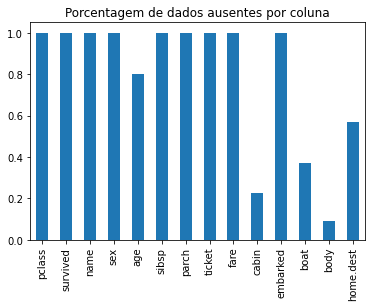

In [92]:
# Faça um gráfico com a porcentagem de dados ausentes em cada variável
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)
plt.title('Porcentagem de dados ausentes por coluna')
plt.show()

In [178]:
# Remova as colunas com mais de 40% de dados ausentes
porcentagem_40 = len(df)*0.40
porcentagem_40
df1 = df.dropna(thresh=porcentagem_40, axis=1)

In [179]:
# Adicione colunas com a informação de que existem dados ausentes nas colunas 'age' e 'embarked', respectivamente
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper

In [180]:
df2 = df1.assign(age_missing=add_indicator('age'))
df2 = df2.assign(embarked_missing=add_indicator('embarked'))

In [181]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,age_missing,embarked_missing
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",0,0
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,0,0
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,1,0
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,0,0
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,0,0


In [182]:
# Aplique uma imputação de dados usando a mediana para a coluna 'age' e most_frequent para a coluna 'embarked'
df2['age'].fillna(df2['age'].median(), inplace=True)
df2['embarked'].fillna(df2['embarked'].mode(), inplace=True)

In [183]:
# Exemplo de mudança de NaN pelo valor da mediana na coluna 'age'.
mediana = df2['age'].median()
df2.loc[df2['age'] == mediana]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,age_missing,embarked_missing
15,1st,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,S,"New York, NY",1,0
29,1st,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,S,"Stockholm, Sweden / Washington, DC",0,0
37,1st,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,28.0,0,0,111427,26.5500,S,"Los Angeles, CA",1,0
40,1st,0,"Brewe, Dr. Arthur Jackson",male,28.0,0,0,112379,39.6000,C,"Philadelphia, PA",1,0
46,1st,0,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,S,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3rd,0,"Williams, Mr. Howard Hugh ""Harry""",male,28.0,0,0,A/5 2466,8.0500,S,NaN,1,0
1297,3rd,0,"Wiseman, Mr. Phillippe",male,28.0,0,0,A/4. 34244,7.2500,S,NaN,1,0
1302,3rd,0,"Yousif, Mr. Wazli",male,28.0,0,0,2647,7.2250,C,NaN,1,0
1303,3rd,0,"Yousseff, Mr. Gerious",male,28.0,0,0,2627,14.4583,C,NaN,1,0


In [184]:
# Exemplo de mudança de NaN para most_frequent na coluna 'embarked'.
most_frequent = df2['embarked'].mode()
df2.loc[df2['embarked'] == most_frequent[0]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,age_missing,embarked_missing
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",0,0
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,3rd,0,"Windelov, Mr. Einar",male,21.0000,0,0,SOTON/OQ 3101317,7.2500,S,NaN,0,0
1296,3rd,0,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,S,NaN,0,0
1297,3rd,0,"Wiseman, Mr. Phillippe",male,28.0000,0,0,A/4. 34244,7.2500,S,NaN,1,0
1298,3rd,0,"Wittevrongel, Mr. Camille",male,36.0000,0,0,345771,9.5000,S,NaN,0,0


In [185]:
# Remova todas as linhas com dados ausentes
# 1 - Na(s) coluna(s) onde faz sentido a aplicação, mapeie as variáveis ordinais
df2['pclass'].value_counts()

3rd    709
1st    323
2nd    277
Name: pclass, dtype: int64

In [186]:
pclass_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
df2['pclass'] = df2['pclass'].map(pclass_mapping)
df2['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [187]:
# 2 - Na(s) coluna(s) onde faz sentido a aplicação, aplique um LabelEncoder
df2['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [188]:
le = LabelEncoder()
df2['sex'] = le.fit_transform(df2['sex'].values)
df2['sex'].value_counts()

1    843
0    466
Name: sex, dtype: int64

In [189]:
# 3 - Na(s) coluna(s) onde faz sentido a aplicação, aplique um OneHotEncoder
df2['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [190]:
embarked_dummies = pd.get_dummies(df2[['embarked']])
embarked_dummies

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,1,0,0
1305,1,0,0
1306,1,0,0
1307,1,0,0


In [193]:
# Gerando dummies e retornando ao DataFrame anterior.
df2 = pd.concat([df2, embarked_dummies], axis=1)
df2 = df2.drop('embarked', axis=1)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,home.dest,age_missing,embarked_missing,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,"St Louis, MO",0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,"Montreal, PQ / Chesterville, ON",0,0,0,0,1


In [170]:
# Faça um reescalonamento nas colunas 'age' e 'fare'. Verifique qual coluna tem o maior e menor desvio padrão e aplique um StandardScaler e MinMaxScaler, respectivamente
df2['fare'].std()
# Maior desvio padrão, portanto utilizar o StandardScaler

51.758668239174135

In [171]:
df2['age'].std()
# Menor desvio padrão, portanto utilizar o MinMaxScaler

12.905246301411317

In [198]:
# Maior desvio padrão, portanto utilizar o StandardScaler na coluna 'fare'.
ss = StandardScaler()
df_ss = ss.fit_transform(df2[['fare']])
df_ss

array([[ 3.44116502],
       [ 2.28560268],
       [ 2.28560268],
       ...,
       [-0.50388566],
       [-0.50388566],
       [-0.49132258]])

In [203]:
# Menor desvio padrão, portanto utilizar o MinMaxScaler na coluna 'age'.
mms = MinMaxScaler()
df_mms = mms.fit_transform(df2[['age']])
df_mms

array([[0.36116884],
       [0.00939458],
       [0.0229641 ],
       ...,
       [0.32985358],
       [0.33611663],
       [0.36116884]])